In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np

import sys
sys.path.append("..")

from channeling_lib import AWS_file_loader, load_path


In [109]:
#get data
path = load_path() + 'RawData/AWS/'

raw_layla_calibdata = path + 'Layla/Calibration/CR1000_Layla_Res_data_1_min_20240910_20250125_2025_01_25_15_51_14.dat'
raw_rosanna_calibdata =  path + 'Rosanna/Calibration/CR200_Rosanna_Res_data_1_min_20240910_20250125_2025_01_25_14_36_19.dat'
raw_mrsrobinson_calibdata =  path + 'Mrs Robinson/Calibration/CR200_MrsRobinson_Res_data_1_min_20240910_20250125_2025_01_25_15_13_29.dat'
raw_bettedavis_calibdata =  path + 'Bette Davis/Calibration/CR200_BetteDavis_Res_data_1_min_20240910_20250125_2025_01_25_15_31_31.dat'
raw_tomjoad_calibdata =  path + 'Tom Joad/Calibration/CR1000_TomJoad_Res_data_1_min_20240910_20250125_2025_01_25_15_56_26.dat'

print(raw_layla_calibdata)

../Data/RawData/AWS/Layla/Calibration/CR1000_Layla_Res_data_1_min_20240910_20250125_2025_01_25_15_51_14.dat


In [110]:
df_layla = AWS_file_loader(raw_layla_calibdata) 
#print(df_layla.head())

df_rosanna = AWS_file_loader(raw_rosanna_calibdata)
#print(df_rosanna.head()) 

df_mrsrobinson = AWS_file_loader(raw_mrsrobinson_calibdata)
#print(df_mrsrobinson.head()) 

df_bettedavis = AWS_file_loader(raw_bettedavis_calibdata)
print(df_bettedavis.head()) 

df_tomjoad = AWS_file_loader(raw_tomjoad_calibdata)
#(df_tomjoad.head()) 

c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)
c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_object

                      RECORD     BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                       
2024-09-09 14:10:00  22912.0  12.60753     2.369150      58.67678         0.0   
2024-09-09 14:11:00  22913.0  12.60501     2.377545      58.85535         0.0   
2024-09-09 14:12:00  22914.0  12.60837     2.379834      58.59741         0.0   
2024-09-09 14:13:00  22915.0  12.60333     2.376146      58.83703         0.0   
2024-09-09 14:14:00  22916.0  12.60166     2.377545      58.22653         0.0   

                     gust_speed  wind_direction  
TIMESTAMP                                        
2024-09-09 14:10:00         0.0             0.0  
2024-09-09 14:11:00         0.0             0.0  
2024-09-09 14:12:00         0.0             0.0  
2024-09-09 14:13:00         0.0             0.0  
2024-09-09 14:14:00         0.0             0.0  


c:\Users\Paula\anaconda3\envs\Boundary_Layer\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [111]:
# common days based on index time
common_days = df_layla.index  # all the same like laylas dates

# filter the others
df_rosanna_filtered = df_rosanna[df_rosanna.index.isin(common_days)]
df_mrsrobinson_filtered = df_mrsrobinson[df_mrsrobinson.index.isin(common_days)]
df_bettedavis_filtered = df_bettedavis[df_bettedavis.index.isin(common_days)]
df_tomjoad_filtered = df_tomjoad[df_tomjoad.index.isin(common_days)]

# # check
# print(df_layla_filtered.head())
print(df_bettedavis_filtered.head())


                      RECORD     BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                       
2025-01-22 16:27:00  35470.0  12.93156     21.03499      31.43012         0.0   
2025-01-22 16:28:00  35471.0  12.91980     20.98778      31.16760         0.0   
2025-01-22 16:29:00  35472.0  12.92904     20.96845      31.72926         0.0   
2025-01-22 16:30:00  35473.0  12.92232     20.96514      31.02261         0.0   
2025-01-22 16:31:00  35474.0  12.92232     20.98269      30.67615         0.0   

                     gust_speed  wind_direction  
TIMESTAMP                                        
2025-01-22 16:27:00         0.0           315.0  
2025-01-22 16:28:00         0.0           315.0  
2025-01-22 16:29:00         0.0           315.0  
2025-01-22 16:30:00         0.0           315.0  
2025-01-22 16:31:00         0.0           315.0  


In [112]:
# #filter
# common_days = df_layla.iloc[:, 0]  # laylas days

# # filtered data
# df_layla_filtered = df_layla[df_layla.iloc[:, 0].isin(common_days)]
# df_rosanna_filtered = df_rosanna[df_rosanna.iloc[:, 0].isin(common_days)]
# df_mrsrobinson_filtered = df_mrsrobinson[df_mrsrobinson.iloc[:, 0].isin(common_days)]
# df_bettedavis_filtered = df_bettedavis[df_bettedavis.iloc[:, 0].isin(common_days)]
# df_tomjoad_filtered = df_tomjoad[df_tomjoad.iloc[:, 0].isin(common_days)]

# # print
# print(df_rosanna_filtered.head())
# print(df_layla_filtered.head())
# # print(df_bettedavis_filtered.head())
# # print(df_tomjoad_filtered.head())
# #print(df_tomjoad_filtered.to_string())  

WIND

time series

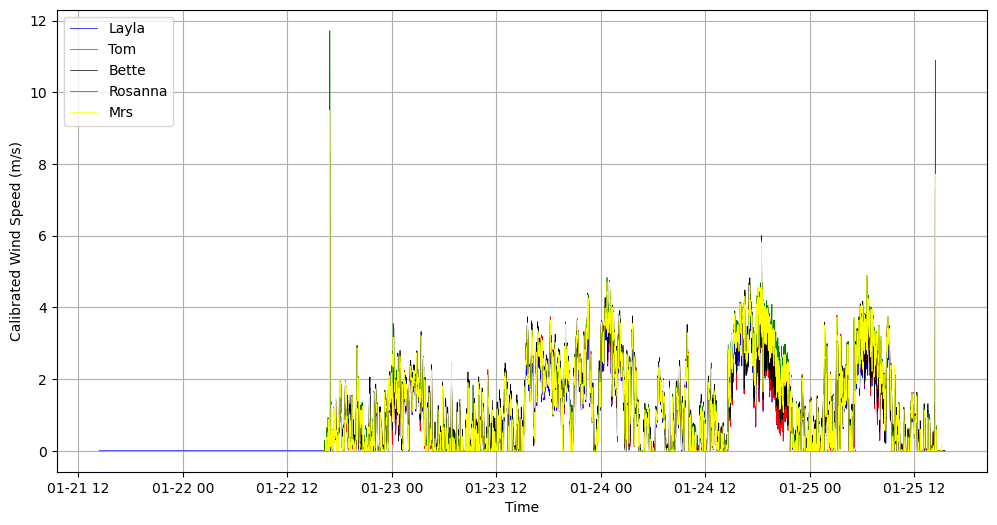

,RECORD,BattV,temperature,rel_humidity,wind_speed,gust_speed,wind_direction
TIMESTAMP,,,,,,,
2025-01-22 16:30:00,16931.0,12.87,20.95,39.36,0.0,0.0,31.59
2025-01-22 16:31:00,16932.0,12.86,20.95,38.81,0.0,0.0,28.52
2025-01-22 16:32:00,16933.0,12.85,20.95,39.79,0.0,0.0,179.60
2025-01-22 16:33:00,16934.0,12.84,20.95,39.23,0.0,0.0,183.90
2025-01-22 16:34:00,16935.0,12.86,20.94,39.00,0.0,0.0,185.10


In [113]:
# Plot für Windgeschwindigkeit
plt.figure(figsize=(12, 6))

# Windgeschwindigkeit für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla.index, df_layla['wind_speed'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered.index, df_tomjoad_filtered['wind_speed'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered.index, df_bettedavis_filtered['wind_speed'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered.index, df_rosanna_filtered['wind_speed'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered.index, df_mrsrobinson_filtered['wind_speed'], label='Mrs', color='yellow', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Calibrated Wind Speed (m/s)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
#df_layla_filtered.index

plt.show()

df_tomjoad_filtered.head()


In [114]:
# # variables
# time = 'TIMESTAMP'
# wind = 'wind_speed'
# pressure = 'air_pressure'
# temperature = 'temperature'
# rel_humidity = 'rel_humidity'
# wind_direction = 'wind_direction'
# gust_speed = 'gust_speed'

cut out weird values (zero/ nan and peaks (too high)
)

Layla Data after filtering:
                      RECORD  BattV  temperature  rel_humidity  wind_speed  \
TIMESTAMP                                                                    
2025-01-22 17:08:00  12893.0  12.39       -5.946         60.65       0.366   
2025-01-22 17:09:00  12894.0  12.38       -6.016         62.51       0.047   
2025-01-22 17:10:00  12895.0  12.38       -6.137         63.18       0.029   
2025-01-22 17:11:00  12896.0  12.38       -6.230         64.20       0.399   
2025-01-22 17:12:00  12897.0  12.38       -6.350         64.97       0.565   

                     gust_speed  wind_direction  air_pressure  \
TIMESTAMP                                                       
2025-01-22 17:08:00       0.549           280.6      994.5526   
2025-01-22 17:09:00       0.490           246.0      994.5626   
2025-01-22 17:10:00       0.235           245.5      994.5707   
2025-01-22 17:11:00       0.804           240.4      994.5823   
2025-01-22 17:12:00       1.117    

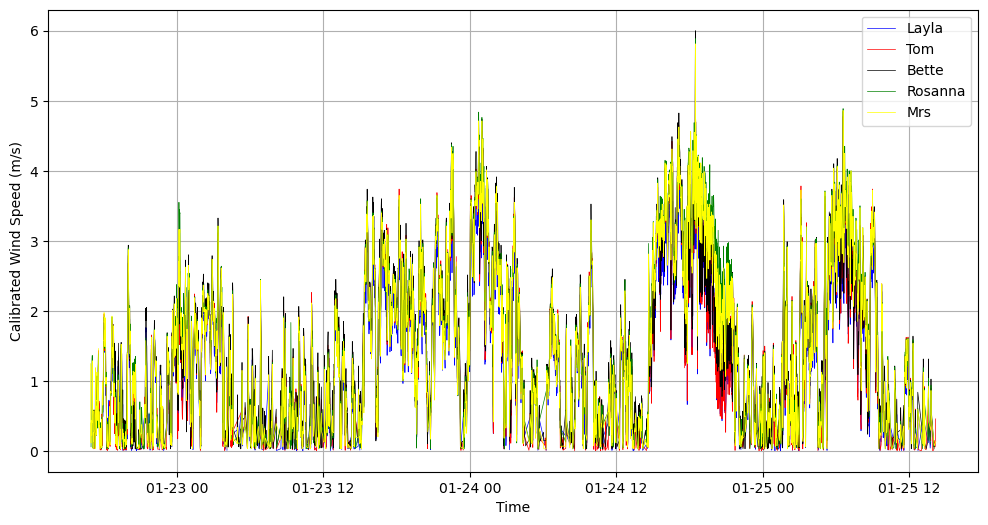

In [115]:
# Entfernen von Nullwerten und den ersten drei sowie letzten zwei Werten
df_layla_filtered_wind = df_layla[df_layla['wind_speed'] != 0]
df_rosanna_filtered_wind = df_rosanna_filtered[df_rosanna_filtered['wind_speed'] != 0]
df_mrsrobinson_filtered_wind = df_mrsrobinson_filtered[df_mrsrobinson_filtered['wind_speed'] != 0]
df_bettedavis_filtered_wind = df_bettedavis_filtered[df_bettedavis_filtered['wind_speed'] != 0]
df_tomjoad_filtered_wind = df_tomjoad_filtered[df_tomjoad_filtered['wind_speed'] != 0]

#cut out manualy (peaks - weird)
df_layla_filtered_wind = df_layla_filtered_wind.iloc[15:-10]
df_rosanna_filtered_wind = df_rosanna_filtered_wind.iloc[15:-10]
df_mrsrobinson_filtered_wind = df_mrsrobinson_filtered_wind.iloc[15:-10]
df_bettedavis_filtered_wind = df_bettedavis_filtered_wind.iloc[115:-10]
df_tomjoad_filtered_wind = df_tomjoad_filtered_wind.iloc[15:-10]

# Überprüfen, ob Nullwerte und die ersten/letzten Werte entfernt wurden
print("Layla Data after filtering:")
print(df_layla_filtered_wind.head())
print("Rosanna Data after filtering:")
print(df_rosanna_filtered_wind.head())
print("Mrs Robinson Data after filtering:")
print(df_mrsrobinson_filtered_wind.head())
print("Bette Davis Data after filtering:")
print(df_bettedavis_filtered_wind.head())
print("Tom Joad Data after filtering:")
print(df_tomjoad_filtered_wind.head())

# Plot für Windgeschwindigkeit nach dem Entfernen der Nullwerte und der ersten/letzten Werte
plt.figure(figsize=(12, 6))

# Windgeschwindigkeit für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_wind.index, df_layla_filtered_wind['wind_speed'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_wind.index, df_tomjoad_filtered_wind['wind_speed'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered_wind.index, df_bettedavis_filtered_wind['wind_speed'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_wind.index, df_rosanna_filtered_wind['wind_speed'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_wind.index, df_mrsrobinson_filtered_wind['wind_speed'], label='Mrs', color='yellow', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Calibrated Wind Speed (m/s)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


In [116]:
# def filter_wind_data(df):
#     df[time] = pd.to_datetime(df[time])  # time as 'datetime'
#     df_filtered = df[df[wind] > 0]  # zero values --> cut out

#     # cut out data that does not fit the curve at the end and beginning
#     if len(df_filtered) > 2:
#         df_filtered = df_filtered.iloc[3:-2]
    
#     return df_filtered
# # filter layla
# df_layla_filtered = filter_wind_data(df_layla)

# # only keep data from laylas time span (without 2024) for all stations
# valid_times = df_layla_filtered[time]

# df_rosanna_filtered = filter_wind_data(df_rosanna)
# df_rosanna_filtered = df_rosanna_filtered[df_rosanna_filtered[time].isin(valid_times)]

# df_mrsrobinson_filtered = filter_wind_data(df_mrsrobinson)
# df_mrsrobinson_filtered = df_mrsrobinson_filtered[df_mrsrobinson_filtered[time].isin(valid_times)]

# df_bettedavis_filtered = filter_wind_data(df_bettedavis)
# df_bettedavis_filtered = df_bettedavis_filtered[df_bettedavis_filtered[time].isin(valid_times)]

# df_tomjoad_filtered = filter_wind_data(df_tomjoad)
# df_tomjoad_filtered = df_tomjoad_filtered[df_tomjoad_filtered[time].isin(valid_times)]
# #df_tomjoad_filtered

In [117]:
# # DataFrames 
# df_avg = df_layla[[time, wind]].rename(columns={wind: 'layla_wind'})

# df_avg = df_avg.merge(df_rosanna_filtered[[time, wind]].rename(columns={wind: 'rosanna_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_mrsrobinson_filtered[[time, wind]].rename(columns={wind: 'mrsrobinson_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_bettedavis_filtered[[time, wind]].rename(columns={wind: 'bettedavis_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_tomjoad_filtered[[time, wind]].rename(columns={wind: 'tomjoad_wind'}), on=time, how='outer')

# #  mean curve over all data
# df_avg['wind_avg'] = df_avg.iloc[:, 1:].mean(axis=1, skipna=True)

# # average of windspeed
# df_avg = df_avg[[time, 'wind_avg']]

# print(df_avg.head())

averaging

                     wind_avg
TIMESTAMP                    
2025-01-22 16:55:00  1.245833
2025-01-22 16:56:00  0.708333
2025-01-22 16:57:00  0.179167
2025-01-22 16:58:00  0.085417
2025-01-22 16:59:00  0.397917


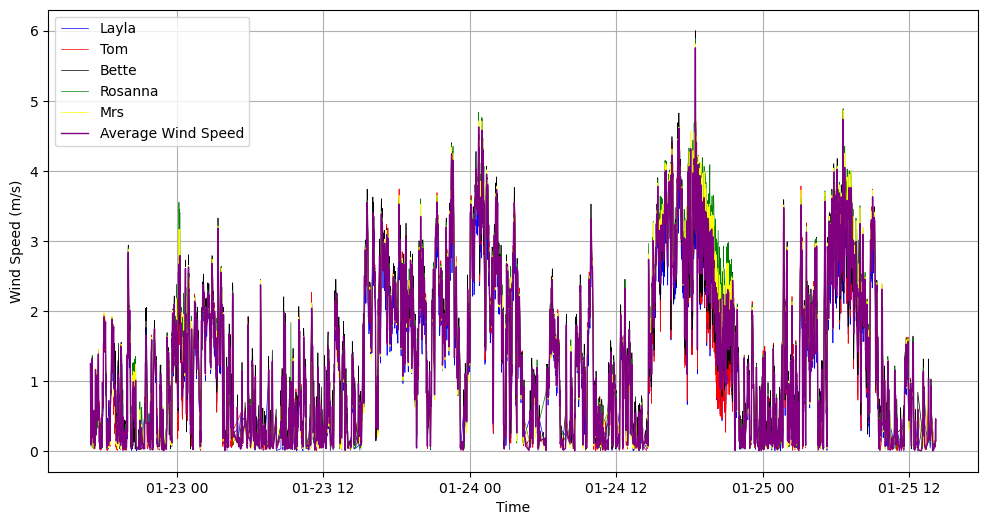

In [118]:
# DataFrames mit den Zeitstempeln (Index) und den Windgeschwindigkeiten
df_avg = df_layla_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'layla_wind'})

# Merge mit den anderen Stationen unter Verwendung des Index als Zeitstempel
df_avg = df_avg.merge(df_rosanna_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'rosanna_wind'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_mrsrobinson_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'mrsrobinson_wind'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_bettedavis_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'bettedavis_wind'}), left_index=True, right_index=True, how='outer')
df_avg = df_avg.merge(df_tomjoad_filtered_wind[['wind_speed']].rename(columns={'wind_speed': 'tomjoad_wind'}), left_index=True, right_index=True, how='outer')

# Mittelwert der Windgeschwindigkeiten berechnen
df_avg['wind_avg'] = df_avg[['layla_wind', 'rosanna_wind', 'mrsrobinson_wind', 'bettedavis_wind', 'tomjoad_wind']].mean(axis=1, skipna=True)

# Nur die Spalten mit Zeit (Index) und dem Mittelwert behalten
df_avg = df_avg[['wind_avg']]

# Ausgabe der ersten Zeilen der berechneten Mittelwerte
print(df_avg.head())

# Plot der Windgeschwindigkeiten für jede Station und den Mittelwert
plt.figure(figsize=(12, 6))

# Windgeschwindigkeit für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered_wind.index, df_layla_filtered_wind['wind_speed'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_tomjoad_filtered_wind.index, df_tomjoad_filtered_wind['wind_speed'], label='Tom', color='red', linewidth=0.5)
plt.plot(df_bettedavis_filtered_wind.index, df_bettedavis_filtered_wind['wind_speed'], label='Bette', color='black', linewidth=0.5)
plt.plot(df_rosanna_filtered_wind.index, df_rosanna_filtered_wind['wind_speed'], label='Rosanna', color='green', linewidth=0.5)
plt.plot(df_mrsrobinson_filtered_wind.index, df_mrsrobinson_filtered_wind['wind_speed'], label='Mrs', color='yellow', linewidth=0.5)

# Mittelwert plotten
plt.plot(df_avg.index, df_avg['wind_avg'], label='Average Wind Speed', color='purple', linewidth=1)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Wind Speed (m/s)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


calibration wind

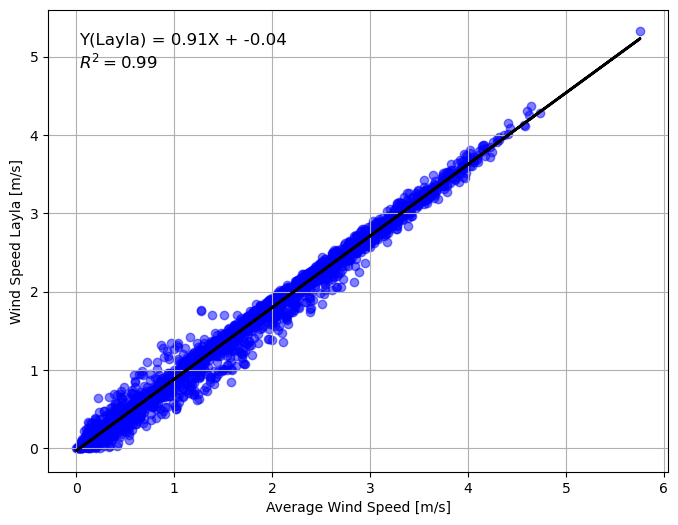

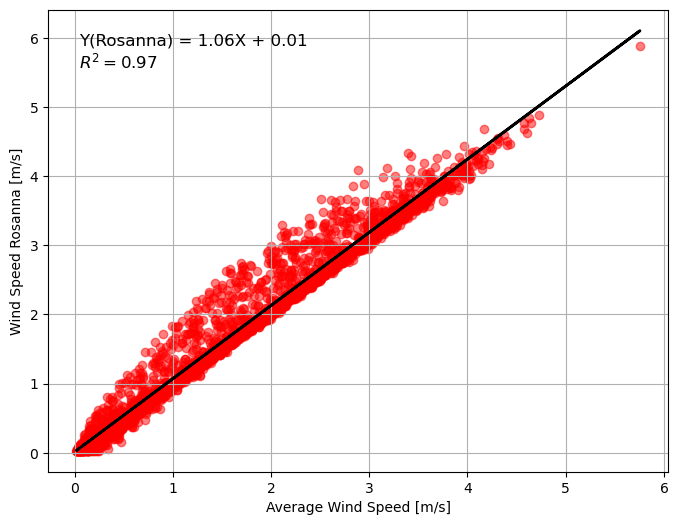

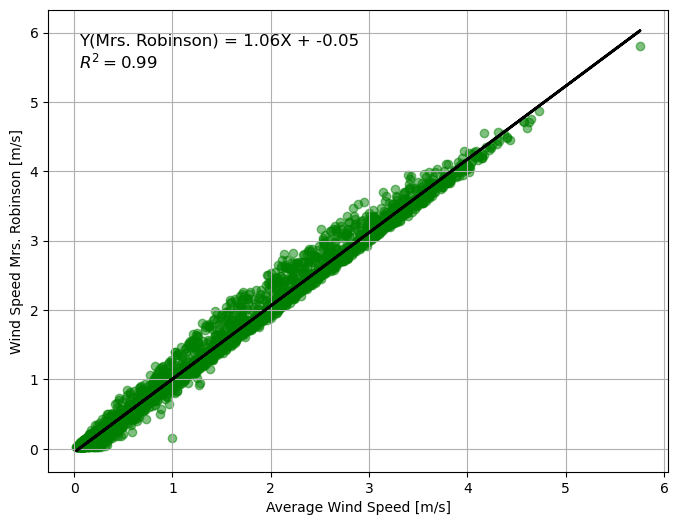

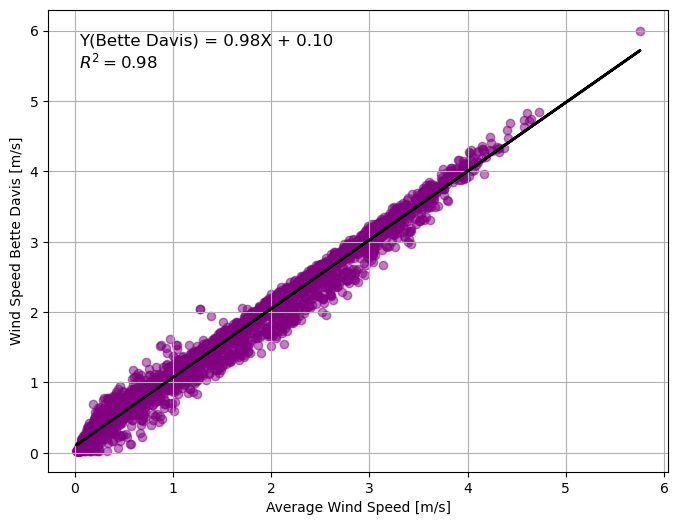

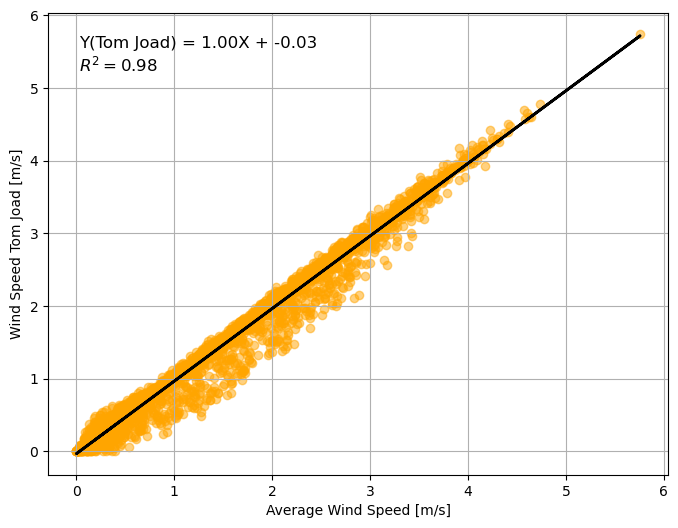

In [119]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

#----------------------------------------------------------------------------------------------------
# Layla Wind
df_scatter_layla = df_layla_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla['wind_avg'], df_scatter_layla['wind_speed'])
regression_line = slope * df_scatter_layla['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_layla['wind_avg'], df_scatter_layla['wind_speed'], color='blue', alpha=0.5)
plt.plot(df_scatter_layla['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Layla [m/s]')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Rosanna Wind
df_scatter_rosanna = df_rosanna_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['wind_avg'], df_scatter_rosanna['wind_speed'])
regression_line = slope * df_scatter_rosanna['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_rosanna['wind_avg'], df_scatter_rosanna['wind_speed'], color='red', alpha=0.5)
plt.plot(df_scatter_rosanna['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Rosanna [m/s]')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Mrs. Robinson Wind
df_scatter_mrsrobinson = df_mrsrobinson_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_mrsrobinson['wind_avg'], df_scatter_mrsrobinson['wind_speed'])
regression_line = slope * df_scatter_mrsrobinson['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_mrsrobinson['wind_avg'], df_scatter_mrsrobinson['wind_speed'], color='green', alpha=0.5)
plt.plot(df_scatter_mrsrobinson['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Mrs. Robinson) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Mrs. Robinson [m/s]')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Bette Davis Wind
df_scatter_bettedavis = df_bettedavis_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_bettedavis['wind_avg'], df_scatter_bettedavis['wind_speed'])
regression_line = slope * df_scatter_bettedavis['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_bettedavis['wind_avg'], df_scatter_bettedavis['wind_speed'], color='purple', alpha=0.5)
plt.plot(df_scatter_bettedavis['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Bette Davis) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Bette Davis [m/s]')
plt.grid(True)
plt.show()

#----------------------------------------------------------------------------------------------------
# Tom Joad Wind
df_scatter_tomjoad = df_tomjoad_filtered_wind[['wind_speed']].merge(df_avg[['wind_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_tomjoad['wind_avg'], df_scatter_tomjoad['wind_speed'])
regression_line = slope * df_scatter_tomjoad['wind_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_tomjoad['wind_avg'], df_scatter_tomjoad['wind_speed'], color='orange', alpha=0.5)
plt.plot(df_scatter_tomjoad['wind_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Tom Joad) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Wind Speed [m/s]')
plt.ylabel('Wind Speed Tom Joad [m/s]')
plt.grid(True)
plt.show()


PRESSURE

time series

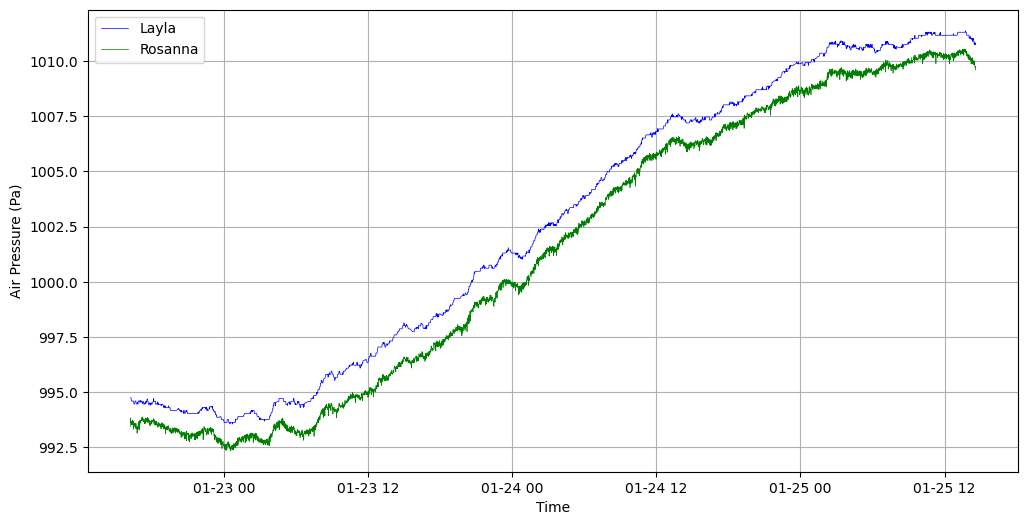

In [120]:
# Entfernen von NaN-Werten in den relevanten Spalten für die jeweilige Station
df_layla_filtered = df_layla.dropna(subset=['air_pressure'])
df_rosanna_filtered = df_rosanna_filtered.dropna(subset=['air_pressure'])

# Gemeinsamen Zeitstempel für beide DataFrames finden
common_index = df_layla_filtered.index.intersection(df_rosanna_filtered.index)

# DataFrames auf den gemeinsamen Index zuschneiden
df_layla_filtered = df_layla_filtered.loc[common_index]
df_rosanna_filtered = df_rosanna_filtered.loc[common_index]

# Plot für Air Pressure
plt.figure(figsize=(12, 6))

# Air Pressure für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered.index, df_layla_filtered['air_pressure'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_rosanna_filtered.index, df_rosanna_filtered['air_pressure'], label='Rosanna', color='green', linewidth=0.5)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Air Pressure (Pa)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


averaging

                     pressure_avg
TIMESTAMP                        
2025-01-22 16:13:00     994.09390
2025-01-22 16:14:00     994.28930
2025-01-22 16:15:00     994.19620
2025-01-22 16:16:00     994.18545
2025-01-22 16:17:00     994.20380


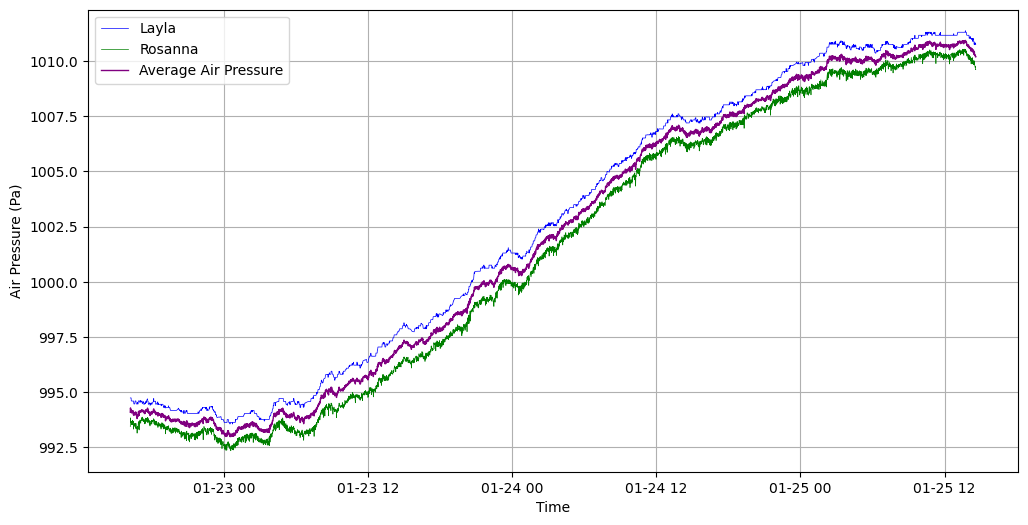

In [121]:
import matplotlib.pyplot as plt

# DataFrames mit den Zeitstempeln (Index) und den Luftdrücken
df_avg_pressure = df_layla_filtered[['air_pressure']].rename(columns={'air_pressure': 'layla_pressure'})

# Merge mit den anderen Stationen unter Verwendung des Index als Zeitstempel
df_avg_pressure = df_avg_pressure.merge(df_rosanna_filtered[['air_pressure']].rename(columns={'air_pressure': 'rosanna_pressure'}), left_index=True, right_index=True, how='outer')

# Mittelwert der Luftdrücke berechnen
df_avg_pressure['pressure_avg'] = df_avg_pressure[['layla_pressure', 'rosanna_pressure']].mean(axis=1, skipna=True)

# Nur die Spalten mit Zeit (Index) und dem Mittelwert behalten
df_avg_pressure = df_avg_pressure[['pressure_avg']]

# Ausgabe der ersten Zeilen der berechneten Mittelwerte
print(df_avg_pressure.head())

# Plot der Luftdrücke für jede Station und den Mittelwert
plt.figure(figsize=(12, 6))

# Luftdruck für jede Station mit der Zeit auf der x-Achse
plt.plot(df_layla_filtered.index, df_layla_filtered['air_pressure'], label='Layla', color='blue', linewidth=0.5)
plt.plot(df_rosanna_filtered.index, df_rosanna_filtered['air_pressure'], label='Rosanna', color='green', linewidth=0.5)

# Mittelwert plotten
plt.plot(df_avg_pressure.index, df_avg_pressure['pressure_avg'], label='Average Air Pressure', color='purple', linewidth=1)

# Diagramm formatieren
plt.xlabel('Time')
plt.ylabel('Air Pressure (Pa)')
plt.legend()
plt.grid(True)

# Diagramm anzeigen
plt.show()


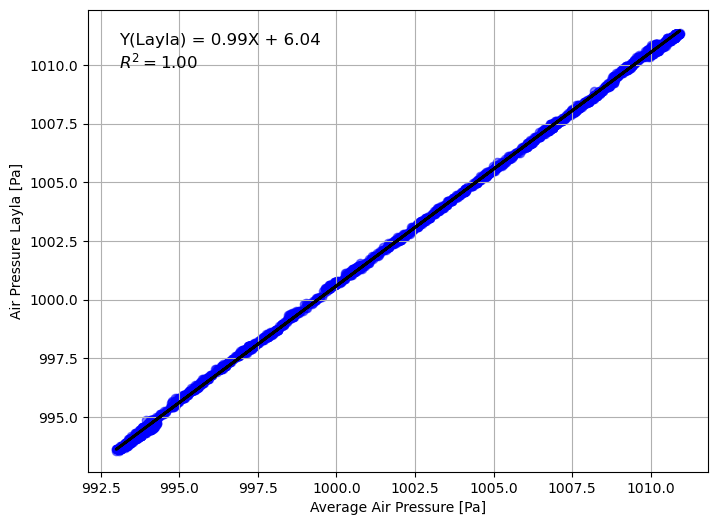

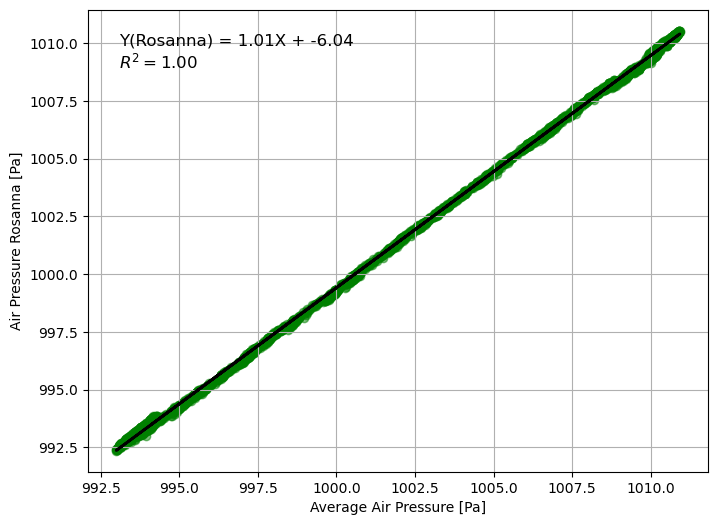

In [122]:
# Layla Pressure
df_scatter_layla_pressure = df_layla_filtered[['air_pressure']].merge(df_avg_pressure[['pressure_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla_pressure['pressure_avg'], df_scatter_layla_pressure['air_pressure'])
regression_line = slope * df_scatter_layla_pressure['pressure_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_layla_pressure['pressure_avg'], df_scatter_layla_pressure['air_pressure'], color='blue', alpha=0.5)
plt.plot(df_scatter_layla_pressure['pressure_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Air Pressure [Pa]')
plt.ylabel('Air Pressure Layla [Pa]')
plt.grid(True)
plt.show()


# Rosanna Pressure
df_scatter_rosanna_pressure = df_rosanna_filtered[['air_pressure']].merge(df_avg_pressure[['pressure_avg']], left_index=True, right_index=True, how='inner')

slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna_pressure['pressure_avg'], df_scatter_rosanna_pressure['air_pressure'])
regression_line = slope * df_scatter_rosanna_pressure['pressure_avg'] + intercept

plt.figure(figsize=(8, 6))
plt.scatter(df_scatter_rosanna_pressure['pressure_avg'], df_scatter_rosanna_pressure['air_pressure'], color='green', alpha=0.5)
plt.plot(df_scatter_rosanna_pressure['pressure_avg'], regression_line, color='black', linewidth=2)

equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
plt.xlabel('Average Air Pressure [Pa]')
plt.ylabel('Air Pressure Rosanna [Pa]')
plt.grid(True)
plt.show()

In [123]:
# from scipy.stats import linregress

# #layla wind
# df_scatter_layla = df_layla_filtered[[time, wind]].merge(df_avg[[time, 'wind_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla['wind_avg'], df_scatter_layla[wind])
# regression_line = slope * df_scatter_layla['wind_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_layla['wind_avg'], df_scatter_layla[wind], color='blue', alpha=0.5)
# plt.plot(df_scatter_layla['wind_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Wind Speed [m/s]')
# plt.ylabel('Wind Speed Layla [m/s]')
# plt.grid(True)

# #plt.savefig("scatter_layla_wind.png", dpi=300)

# plt.show()

# #-----------------------------------------------------------------

# #rosanna wind
# df_scatter_rosanna = df_rosanna_filtered[[time, wind]].merge(df_avg[[time, 'wind_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['wind_avg'], df_scatter_rosanna[wind])
# regression_line = slope * df_scatter_rosanna['wind_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_rosanna['wind_avg'], df_scatter_rosanna[wind], color='red', alpha=0.5)
# plt.plot(df_scatter_rosanna['wind_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Wind Speed [m/s]')
# plt.ylabel('Wind Speed Rosanna [m/s]')
# plt.grid(True)

# #plt.savefig("scatter_rosanna_wind.png", dpi=300)

# plt.show()

# #-----------------------------------------------------------------

# # mrs robinson
# df_scatter_mrsrobinson = df_mrsrobinson_filtered[[time, wind]].merge(df_avg[[time, 'wind_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_mrsrobinson['wind_avg'], df_scatter_mrsrobinson[wind])

# regression_line = slope * df_scatter_mrsrobinson['wind_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_mrsrobinson['wind_avg'], df_scatter_mrsrobinson[wind], color='green', alpha=0.5)
# plt.plot(df_scatter_mrsrobinson['wind_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Mrs. Robinson) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Wind Speed [m/s]')
# plt.ylabel('Wind Speed Mrs. Robinson [m/s]')
# plt.grid(True)

# #plt.savefig("scatter_mrsrobinson_wind.png", dpi=300)

# plt.show()

# #--------------------------------------------------------------------------------------------------------------------
# # bette davis

# df_scatter_bettedavis = df_bettedavis_filtered[[time, wind]].merge(df_avg[[time, 'wind_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_bettedavis['wind_avg'], df_scatter_bettedavis[wind])

# regression_line = slope * df_scatter_bettedavis['wind_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_bettedavis['wind_avg'], df_scatter_bettedavis[wind], color='purple', alpha=0.5)
# plt.plot(df_scatter_bettedavis['wind_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Bette Davis) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Wind Speed [m/s]')
# plt.ylabel('Wind Speed Bette Davis [m/s]')
# plt.grid(True)

# #plt.savefig("scatter_bettedavis_wind.png", dpi=300)

# plt.show()

# #------------------------------------------------------------------------------------------------------------------------

# # tom joad
# df_scatter_tomjoad = df_tomjoad_filtered[[time, wind]].merge(df_avg[[time, 'wind_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_tomjoad['wind_avg'], df_scatter_tomjoad[wind])

# regression_line = slope * df_scatter_tomjoad['wind_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_tomjoad['wind_avg'], df_scatter_tomjoad[wind], color='orange', alpha=0.5)
# plt.plot(df_scatter_tomjoad['wind_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Tom Joad) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Wind Speed [m/s]')
# plt.ylabel('Wind Speed Tom Joad [m/s]')
# plt.grid(True)

# #plt.savefig("scatter_tomjoad_wind.png", dpi=300)

# plt.show()


In [124]:
# # DataFrames 
# df_avg = df_layla[[time, wind]].rename(columns={wind: 'layla_wind'})

# df_avg = df_avg.merge(df_rosanna_filtered[[time, wind]].rename(columns={wind: 'rosanna_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_mrsrobinson_filtered[[time, wind]].rename(columns={wind: 'mrsrobinson_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_bettedavis_filtered[[time, wind]].rename(columns={wind: 'bettedavis_wind'}), on=time, how='outer')
# df_avg = df_avg.merge(df_tomjoad_filtered[[time, wind]].rename(columns={wind: 'tomjoad_wind'}), on=time, how='outer')

# #  mean curve over all data
# df_avg['wind_avg'] = df_avg.iloc[:, 1:].mean(axis=1, skipna=True)

# # average of windspeed
# df_avg = df_avg[[time, 'wind_avg']]

# print(df_avg.head())

In [125]:
# # temperature

# df_avg_temp = df_layla[[time, temperature]].rename(columns={temperature: 'layla_temperature'})

# df_avg_temp = df_avg_temp.merge(df_rosanna_filtered[[time, temperature]].rename(columns={temperature: 'rosanna_temperature'}), on=time, how='outer')
# df_avg_temp = df_avg_temp.merge(df_mrsrobinson_filtered[[time, temperature]].rename(columns={temperature: 'mrsrobinson_temperature'}), on=time, how='outer')
# df_avg_temp = df_avg_temp.merge(df_bettedavis_filtered[[time, temperature]].rename(columns={temperature: 'bettedavis_temperature'}), on=time, how='outer')
# df_avg_temp = df_avg_temp.merge(df_tomjoad_filtered[[time, temperature]].rename(columns={temperature: 'tomjoad_temperature'}), on=time, how='outer')

# df_avg_temp['temperature_avg'] = df_avg_temp.iloc[:, 1:].mean(axis=1, skipna=True)

# df_avg_temp = df_avg_temp[[time, 'temperature_avg']]

# print(df_avg_temp.head())


In [126]:
# # Durchschnitt des Luftdrucks berechnen
# df_avg_pressure = df_layla_filtered[[time, pressure]].rename(columns={pressure: 'layla_pressure'})

# df_avg_pressure = df_avg_pressure.merge(df_rosanna_filtered[[time, 'air_pressure']].rename(columns={'air_pressure': 'rosanna_pressure'}), on=time, how='outer')
# #df_avg_pressure = df_avg_pressure.merge(df_mrsrobinson_filtered[[time, 'air_pressure']].rename(columns={'air_pressure': 'mrsrobinson_pressure'}), on=time, how='outer')
# #df_avg_pressure = df_avg_pressure.merge(df_bettedavis_filtered[[time, 'air_pressure']].rename(columns={'air_pressure': 'bettedavis_pressure'}), on=time, how='outer')
# # df_avg_pressure = df_avg_pressure.merge(df_tomjoad_filtered[[time, 'air_pressure']].rename(columns={'air_pressure': 'tomjoad_pressure'}), on=time, how='outer')

# # Berechnen des Durchschnitts
# df_avg_pressure['pressure_avg'] = df_avg_pressure.iloc[:, 1:].mean(axis=1, skipna=True)

# df_avg_pressure = df_avg_pressure[[time, 'pressure_avg']]

# print(df_avg_pressure.head())


In [127]:
# # rel_humidity

# df_avg_rel_humidity = df_layla_filtered[[time, rel_humidity]].rename(columns={rel_humidity: 'layla_rel_humidity'})

# df_avg_rel_humidity = df_avg_rel_humidity.merge(df_rosanna_filtered[[time, rel_humidity]].rename(columns={rel_humidity: 'rosanna_rel_humidity'}), on=time, how='outer')
# df_avg_rel_humidity = df_avg_rel_humidity.merge(df_mrsrobinson_filtered[[time, rel_humidity]].rename(columns={rel_humidity: 'mrsrobinson_rel_humidity'}), on=time, how='outer')
# df_avg_rel_humidity = df_avg_rel_humidity.merge(df_bettedavis_filtered[[time, rel_humidity]].rename(columns={rel_humidity: 'bettedavis_rel_humidity'}), on=time, how='outer')
# df_avg_rel_humidity = df_avg_rel_humidity.merge(df_tomjoad_filtered[[time, rel_humidity]].rename(columns={rel_humidity: 'tomjoad_rel_humidity'}), on=time, how='outer')

# df_avg_rel_humidity['rel_humidity_avg'] = df_avg_rel_humidity.iloc[:, 1:].mean(axis=1, skipna=True)

# df_avg_rel_humidity = df_avg_rel_humidity[[time, 'rel_humidity_avg']]

# print(df_avg_rel_humidity.head())


In [128]:
# # wind direction

# df_avg_wind_direction = df_layla_filtered[[time, wind_direction]].rename(columns={wind_direction: 'layla_wind_direction'})

# df_avg_wind_direction = df_avg_wind_direction.merge(df_rosanna_filtered[[time, wind_direction]].rename(columns={wind_direction: 'rosanna_wind_direction'}), on=time, how='outer')
# df_avg_wind_direction = df_avg_wind_direction.merge(df_mrsrobinson_filtered[[time, wind_direction]].rename(columns={wind_direction: 'mrsrobinson_wind_direction'}), on=time, how='outer')
# df_avg_wind_direction = df_avg_wind_direction.merge(df_bettedavis_filtered[[time, wind_direction]].rename(columns={wind_direction: 'bettedavis_wind_direction'}), on=time, how='outer')
# df_avg_wind_direction = df_avg_wind_direction.merge(df_tomjoad_filtered[[time, wind_direction]].rename(columns={wind_direction: 'tomjoad_wind_direction'}), on=time, how='outer')

# df_avg_wind_direction['wind_direction_avg'] = df_avg_wind_direction.iloc[:, 1:].mean(axis=1, skipna=True)

# df_avg_wind_direction = df_avg_wind_direction[[time, 'wind_direction_avg']]

# print(df_avg_wind_direction.head())


In [129]:
# # gusts

# df_avg_gust_speed = df_layla_filtered[[time, gust_speed]].rename(columns={gust_speed: 'layla_gust_speed'})

# df_avg_gust_speed = df_avg_gust_speed.merge(df_rosanna_filtered[[time, gust_speed]].rename(columns={gust_speed: 'rosanna_gust_speed'}), on=time, how='outer')
# df_avg_gust_speed = df_avg_gust_speed.merge(df_mrsrobinson_filtered[[time, gust_speed]].rename(columns={gust_speed: 'mrsrobinson_gust_speed'}), on=time, how='outer')
# df_avg_gust_speed = df_avg_gust_speed.merge(df_bettedavis_filtered[[time, gust_speed]].rename(columns={gust_speed: 'bettedavis_gust_speed'}), on=time, how='outer')
# df_avg_gust_speed = df_avg_gust_speed.merge(df_tomjoad_filtered[[time, gust_speed]].rename(columns={gust_speed: 'tomjoad_gust_speed'}), on=time, how='outer')

# df_avg_gust_speed['gust_speed_avg'] = df_avg_gust_speed.iloc[:, 1:].mean(axis=1, skipna=True)

# df_avg_gust_speed = df_avg_gust_speed[[time, 'gust_speed_avg']]

# print(df_avg_gust_speed.head())


In [130]:
# # Füge die gemittelten Werte aus den DataFrames für die anderen Variablen hinzu
# df_avg['temperature_avg'] = df_avg_temp['temperature_avg']
# df_avg['pressure_avg'] = df_avg_pressure['pressure_avg']
# df_avg['rel_humidity_avg'] = df_avg_rel_humidity['rel_humidity_avg']
# df_avg['wind_direction_avg'] = df_avg_wind_direction['wind_direction_avg']
# df_avg['gust_speed_avg'] = df_avg_gust_speed['gust_speed_avg']

# # Zeige das Ergebnis an
# print(df_avg.head())


wind: time series + average over all stations

In [131]:
# # Plot 
# plt.figure(figsize=(12, 6))

# plt.plot(df_layla_filtered[time], df_layla_filtered[wind], label='Layla', color='blue', linewidth=0.5)
# plt.plot(df_rosanna_filtered[time], df_rosanna_filtered[wind], label='Rosanna', color='red', linewidth=0.5)
# plt.plot(df_mrsrobinson_filtered[time], df_mrsrobinson_filtered[wind], label='Mrs. Robinson', color='green', linewidth=0.5)
# plt.plot(df_bettedavis_filtered[time], df_bettedavis_filtered[wind], label='Bette Davis', color='purple', linewidth=0.5)
# plt.plot(df_tomjoad_filtered[time], df_tomjoad_filtered[wind], label='Tom Joad', color='orange', linewidth=0.5)

# #plot mean
# plt.plot(df_avg[time], df_avg['wind_avg'], label='mean', color='black', linewidth=1)

# # Diagramm formatieren
# #plt.title('Windgeschwindigkeit über Zeit für alle Stationen (Layla-Zeitraum)')
# plt.xlabel('time')
# plt.ylabel('windspeed [m/s]')
# plt.legend()
# plt.grid(True)

# #plt.savefig("allstations_wind.png", dpi=300)

# plt.show()

# #df_avg.to_csv("mean_wind.csv", index=False)

# #print("saved csv: mean_wind.csv")

calib for wind

pressure: time series + average over all stations

In [132]:
# # Plot für Temperatur
# plt.figure(figsize=(12, 6))

# plt.plot(df_layla_filtered[time], df_layla_filtered[pressure], label='Layla', color='blue', linewidth=0.5)
# plt.plot(df_rosanna_filtered[time], df_rosanna_filtered[pressure], label='Rosanna', color='red', linewidth=0.5)
# #plt.plot(df_mrsrobinson_filtered[time], df_mrsrobinson_filtered[temperature], label='Mrs. Robinson', color='green', linewidth=0.5)
# #plt.plot(df_bettedavis_filtered[time], df_bettedavis_filtered[temperature], label='Bette Davis', color='purple', linewidth=0.5)
# #plt.plot(df_tomjoad_filtered[time], df_tomjoad_filtered[temperature], label='Tom Joad', color='orange', linewidth=0.5)

# # plot mean temperature
# plt.plot(df_avg[time], df_avg['pressure_avg'], label='mean pressure', color='black', linewidth=1)

# # Diagramm formatieren
# plt.xlabel('time')
# plt.ylabel('pressure [hPa]')
# plt.legend()
# plt.grid(True)

# # Diagramm anzeigen
# plt.show()

# # Optional: Diagramm als Bild speichern
# #plt.savefig("allstations_pressure.png", dpi=300)



calib for pressure

In [133]:
# # Layla Pressure
# df_scatter_layla = df_layla_filtered[[time, pressure]].merge(df_avg_pressure[[time, 'pressure_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla['pressure_avg'], df_scatter_layla[pressure])
# regression_line = slope * df_scatter_layla['pressure_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_layla['pressure_avg'], df_scatter_layla[pressure], color='blue', alpha=0.5)
# plt.plot(df_scatter_layla['pressure_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Pressure [hPa]')
# plt.ylabel('Pressure Layla [hPa]')
# plt.grid(True)

# #plt.savefig("scatter_layla_pressure.png", dpi=300)

# plt.show()

# #--------------------------------------------------------------------------------------------------------

# # Rosanna Pressure
# df_scatter_rosanna = df_rosanna_filtered[[time, pressure]].merge(df_avg_pressure[[time, 'pressure_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['pressure_avg'], df_scatter_rosanna[pressure])
# regression_line = slope * df_scatter_rosanna['pressure_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_rosanna['pressure_avg'], df_scatter_rosanna[pressure], color='red', alpha=0.5)
# plt.plot(df_scatter_rosanna['pressure_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Pressure [hPa]')
# plt.ylabel('Pressure Rosanna [hPa]')
# plt.grid(True)

# #plt.savefig("scatter_rosanna_pressure.png", dpi=300)

# plt.show()

wind direction: time series + average

In [134]:
# import matplotlib.ticker as ticker

# # layla
# plt.figure(figsize=(12, 6))
# plt.scatter(df_layla_filtered[time], df_layla_filtered[wind_direction], label='Layla', color='blue', alpha=0.5)
# plt.xlabel('time')
# plt.ylabel('wind direction [°]')
# plt.legend()
# plt.grid(True)
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(45))  # Setzt den Abstand der Y-Achsen-Beschriftungen
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}°'))  # Formatierung der Windrichtung
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # z.B. alle 2 Stunden
# plt.gcf().autofmt_xdate()  
# plt.ylim(0, 360)
# plt.show()
# #plt.savefig("wind_direction_scatter_layla.png", dpi=300)

# #------------------------------------------------------------------------------------------------
# # tom joad
# plt.figure(figsize=(12, 6))
# plt.scatter(df_tomjoad_filtered[time], df_tomjoad_filtered[wind_direction], label='Tom Joad', color='orange', alpha=0.5)
# plt.xlabel('time')
# plt.ylabel('wind direction [°]')
# plt.legend()
# plt.grid(True)
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(45))  # Setzt den Abstand der Y-Achsen-Beschriftungen
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}°'))  # Formatierung der Windrichtung
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # z.B. alle 2 Stunden
# plt.gcf().autofmt_xdate() 
# plt.ylim(0, 360) 
# plt.show()
# #plt.savefig("wind_direction_scatter_tomjoad.png", dpi=300)


In [135]:
# #------------------------------------------------------------------------------------------------
# #rosanna
# plt.figure(figsize=(12, 6))
# plt.scatter(df_rosanna_filtered[time], df_rosanna_filtered[wind_direction], label='Rosanna', color='red', alpha=0.5)
# plt.xlabel('time')
# plt.ylabel('wind direction [°]')
# plt.legend()
# plt.grid(True)
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(45))  # Setzt den Abstand der Y-Achsen-Beschriftungen
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}°'))  # Formatierung der Windrichtung
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # z.B. alle 2 Stunden
# plt.gcf().autofmt_xdate()  
# plt.ylim(0, 360)  
# plt.show()
# #plt.savefig("wind_direction_scatter_rosanna.png", dpi=300)


# #------------------------------------------------------------------------------------------------
# #mrs robinson
# plt.figure(figsize=(12, 6))
# plt.scatter(df_mrsrobinson_filtered[time], df_mrsrobinson_filtered[wind_direction], label='Mrs. Robinson', color='green', alpha=0.5)
# plt.xlabel('time')
# plt.ylabel('wind direction [°]')
# plt.legend()
# plt.grid(True)
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(45))  # Setzt den Abstand der Y-Achsen-Beschriftungen
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}°'))  # Formatierung der Windrichtung
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # z.B. alle 2 Stunden
# plt.gcf().autofmt_xdate()  # Automatische Drehung der X-Achsen-Beschriftungen
# plt.ylim(0, 360)  # Bereich für Windrichtung von 0 bis 360 Grad
# plt.show()
# #plt.savefig("wind_direction_scatter_mrsrobinson.png", dpi=300)


# #------------------------------------------------------------------------------------------------
# #bettedavis
# plt.figure(figsize=(12, 6))
# plt.scatter(df_bettedavis_filtered[time], df_bettedavis_filtered[wind_direction], label='Bette Davis', color='purple', alpha=0.5)
# plt.xlabel('time')
# plt.ylabel('wind direction [°]')
# plt.legend()
# plt.grid(True)
# plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(45))  # Setzt den Abstand der Y-Achsen-Beschriftungen
# plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:.0f}°'))  # Formatierung der Windrichtung
# plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # z.B. alle 2 Stunden
# plt.gcf().autofmt_xdate()  
# plt.ylim(0, 360)  
# plt.show()
# #plt.savefig("wind_direction_scatter_bettedavis.png", dpi=300)

temperature: time series + average

In [136]:
# import matplotlib.ticker as ticker

# # Sicherstellen, dass die 'temperature' Spalte als numerischer Datentyp vorliegt
# df_layla_filtered['temperature'] = pd.to_numeric(df_layla_filtered['temperature'], errors='coerce')
# df_rosanna_filtered['temperature'] = pd.to_numeric(df_rosanna_filtered['temperature'], errors='coerce')
# df_mrsrobinson_filtered['temperature'] = pd.to_numeric(df_mrsrobinson_filtered['temperature'], errors='coerce')
# df_bettedavis_filtered['temperature'] = pd.to_numeric(df_bettedavis_filtered['temperature'], errors='coerce')
# df_tomjoad_filtered['temperature'] = pd.to_numeric(df_tomjoad_filtered['temperature'], errors='coerce')

# # Entfernen des ersten Werts aus den Daten
# df_layla_filtered = df_layla_filtered.iloc[7:]
# df_rosanna_filtered = df_rosanna_filtered.iloc[7:]
# df_mrsrobinson_filtered = df_mrsrobinson_filtered.iloc[7:]
# df_bettedavis_filtered = df_bettedavis_filtered.iloc[7:]
# df_tomjoad_filtered = df_tomjoad_filtered.iloc[7:]

# # Auch für den Mittelwert
# df_avg = df_avg.iloc[7:]

# # Liniendiagramm für Temperatur
# plt.figure(figsize=(12, 6))

# # Liniendiagramme für jede Station
# plt.plot(df_layla_filtered[time], df_layla_filtered['temperature'], label='Layla', color='blue', linewidth=0.5)
# plt.plot(df_rosanna_filtered[time], df_rosanna_filtered['temperature'], label='Rosanna', color='red', linewidth=0.5)
# plt.plot(df_mrsrobinson_filtered[time], df_mrsrobinson_filtered['temperature'], label='Mrs. Robinson', color='green', linewidth=0.5)
# plt.plot(df_bettedavis_filtered[time], df_bettedavis_filtered['temperature'], label='Bette Davis', color='purple', linewidth=0.5)
# plt.plot(df_tomjoad_filtered[time], df_tomjoad_filtered['temperature'], label='Tom Joad', color='orange', linewidth=0.5)

# # Liniendiagramm für den Mittelwert
# plt.plot(df_avg[time], df_avg['temperature_avg'], label='mean temperature', color='black', linewidth=1)

# # Diagramm formatieren
# plt.xlabel('time')
# plt.ylabel('temperature [°C]')
# plt.legend()

# # Y-Achse nach Größe der Werte sortieren
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='lower'))

# # Manuell den Bereich der Y-Achse anpassen, falls nötig
# plt.ylim(df_layla_filtered['temperature'].min() - 1, df_layla_filtered['temperature'].max() + 1)

# # Diagramm anzeigen
# plt.show()

# # Optional: Diagramm als Bild speichern
# # plt.savefig("allstations_temperature.png", dpi=300)


calib for temperature

In [137]:
# # Überprüfen, ob es NaN-Werte gibt
# nan_count_temp = df_scatter_layla['temperature'].isna().sum()
# nan_count_temp_avg = df_scatter_layla['temperature_avg'].isna().sum()

# print(f"Layla - NaN count in temperature: {nan_count_temp}")
# print(f"Layla - NaN count in temperature_avg: {nan_count_temp_avg}")

# # Überprüfen, ob es wenig Variation gibt (d.h., konstante Werte)
# temp_variance = df_scatter_layla['temperature'].var()
# temp_avg_variance = df_scatter_layla['temperature_avg'].var()

# print(f"Layla - Temperature Variance: {temp_variance}")
# print(f"Layla - Avg Temperature Variance: {temp_avg_variance}")

# # Wenn NaN-Werte vorhanden sind, diese aus den Daten entfernen
# df_scatter_layla_clean = df_scatter_layla.dropna(subset=['temperature', 'temperature_avg'])

# # Wenn die Daten sehr wenig Variation haben, könnte eine Regression nicht sinnvoll sein
# if temp_variance == 0 or temp_avg_variance == 0:
#     print(f"Warning: The data for Layla has very little variation (variance = 0). A regression may not be possible.")
# else:
#     # Führe die Regression nur aus, wenn es genug Variation gibt
#     slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla_clean['temperature_avg'], df_scatter_layla_clean['temperature'])
#     regression_line = slope * df_scatter_layla_clean['temperature_avg'] + intercept
    
#     # Ausgabe der Regressionsparameter
#     print(f"Regression parameters for Layla after cleaning data:")
#     print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R: {r_value:.4f}, R²: {r_value**2:.4f}")
    
#     # Plotten
#     plt.figure(figsize=(8, 6))
#     plt.scatter(df_scatter_layla_clean['temperature_avg'], df_scatter_layla_clean['temperature'], color='blue', alpha=0.5)
    
#     # Wenn Regression existiert, plotte die Regressionslinie
#     if r_value**2 >= 0.1:
#         plt.plot(df_scatter_layla_clean['temperature_avg'], regression_line, color='black', linewidth=2)
    
#     equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'
#     plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
    
#     plt.xlabel('Average Temperature [°C]')
#     plt.ylabel('Temperature Layla [°C]')
#     plt.grid(True)
#     plt.show()


In [138]:
# def plot_regression(df_scatter, station_name, color):
#     # Überprüfung der Min- und Max-Werte der Temperaturdaten
#     temp_min = df_scatter['temperature'].min()
#     temp_max = df_scatter['temperature'].max()
#     temp_avg_min = df_scatter['temperature_avg'].min()
#     temp_avg_max = df_scatter['temperature_avg'].max()
    
#     print(f"{station_name} - Temperature Min: {temp_min}, Max: {temp_max}")
#     print(f"{station_name} - Avg Temperature Min: {temp_avg_min}, Max: {temp_avg_max}")
    
#     # Durchführung der linearen Regression
#     slope, intercept, r_value, p_value, std_err = linregress(df_scatter['temperature_avg'], df_scatter['temperature'])
    
#     # Ausgabe der Regressionsparameter
#     print(f"Regression parameters for {station_name}:")
#     print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R: {r_value:.4f}, R²: {r_value**2:.4f}")
    
#     # Wenn der R²-Wert zu klein ist, ignorieren wir die Regressionslinie
#     if r_value**2 < 0.1:
#         print(f"Warning: R² is too small for {station_name}. Skipping regression.")
#         regression_line = None
#     else:
#         regression_line = slope * df_scatter['temperature_avg'] + intercept
    
#     # Plotten
#     plt.figure(figsize=(8, 6))
#     plt.scatter(df_scatter['temperature_avg'], df_scatter['temperature'], color=color, alpha=0.5)
    
#     # Wenn Regression existiert, plotte die Regressionslinie
#     if regression_line is not None:
#         plt.plot(df_scatter['temperature_avg'], regression_line, color='black', linewidth=2)
    
#     equation_text = f'Y({station_name}) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'
#     plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
    
#     plt.xlabel('Average Temperature [°C]')
#     plt.ylabel(f'Temperature {station_name} [°C]')
#     plt.grid(True)
#     plt.show()

# # Rosanna Temperatur
# df_scatter_rosanna = df_rosanna_filtered[[time, 'temperature']].merge(df_avg[[time, 'temperature_avg']], on=time, how='inner')
# plot_regression(df_scatter_rosanna, "Rosanna", 'red')

# #-----------------------------------------------------------------

# # Mrs. Robinson Temperatur
# df_scatter_mrsrobinson = df_mrsrobinson_filtered[[time, 'temperature']].merge(df_avg[[time, 'temperature_avg']], on=time, how='inner')
# plot_regression(df_scatter_mrsrobinson, "Mrs. Robinson", 'green')

# #-----------------------------------------------------------------

# # Bette Davis Temperatur
# df_scatter_bettedavis = df_bettedavis_filtered[[time, 'temperature']].merge(df_avg[[time, 'temperature_avg']], on=time, how='inner')
# plot_regression(df_scatter_bettedavis, "Bette Davis", 'purple')

In [139]:
# # Überprüfen, ob es NaN-Werte gibt für Tom Joad
# nan_count_temp = df_scatter_tomjoad['temperature'].isna().sum()
# nan_count_temp_avg = df_scatter_tomjoad['temperature_avg'].isna().sum()

# print(f"Tom Joad - NaN count in temperature: {nan_count_temp}")
# print(f"Tom Joad - NaN count in temperature_avg: {nan_count_temp_avg}")

# # Überprüfen, ob es wenig Variation gibt (d.h., konstante Werte) für Tom Joad
# temp_variance = df_scatter_tomjoad['temperature'].var()
# temp_avg_variance = df_scatter_tomjoad['temperature_avg'].var()

# print(f"Tom Joad - Temperature Variance: {temp_variance}")
# print(f"Tom Joad - Avg Temperature Variance: {temp_avg_variance}")

# # Wenn NaN-Werte vorhanden sind, diese aus den Daten entfernen für Tom Joad
# df_scatter_tomjoad_clean = df_scatter_tomjoad.dropna(subset=['temperature', 'temperature_avg'])

# # Wenn die Daten sehr wenig Variation haben, könnte eine Regression nicht sinnvoll sein
# if temp_variance == 0 or temp_avg_variance == 0:
#     print(f"Warning: The data for Tom Joad has very little variation (variance = 0). A regression may not be possible.")
# else:
#     # Führe die Regression nur aus, wenn es genug Variation gibt
#     slope, intercept, r_value, p_value, std_err = linregress(df_scatter_tomjoad_clean['temperature_avg'], df_scatter_tomjoad_clean['temperature'])
#     regression_line = slope * df_scatter_tomjoad_clean['temperature_avg'] + intercept
    
#     # Ausgabe der Regressionsparameter für Tom Joad
#     print(f"Regression parameters for Tom Joad after cleaning data:")
#     print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R: {r_value:.4f}, R²: {r_value**2:.4f}")
    
#     # Plotten für Tom Joad
#     plt.figure(figsize=(8, 6))
#     plt.scatter(df_scatter_tomjoad_clean['temperature_avg'], df_scatter_tomjoad_clean['temperature'], color='orange', alpha=0.5)
    
#     # Wenn Regression existiert, plotte die Regressionslinie
#     if r_value**2 >= 0.1:
#         plt.plot(df_scatter_tomjoad_clean['temperature_avg'], regression_line, color='black', linewidth=2)
    
#     equation_text = f'Y(Tom Joad) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'
#     plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
    
#     plt.xlabel('Average Temperature [°C]')
#     plt.ylabel('Temperature Tom Joad [°C]')
#     plt.grid(True)
#     plt.show()


relative humidity: time series + average

In [140]:
# import matplotlib.ticker as ticker

# # Sicherstellen, dass die 'rel_humidity' Spalte als numerischer Datentyp vorliegt
# df_layla_filtered['rel_humidity'] = pd.to_numeric(df_layla_filtered['rel_humidity'], errors='coerce')
# df_rosanna_filtered['rel_humidity'] = pd.to_numeric(df_rosanna_filtered['rel_humidity'], errors='coerce')
# df_mrsrobinson_filtered['rel_humidity'] = pd.to_numeric(df_mrsrobinson_filtered['rel_humidity'], errors='coerce')
# df_bettedavis_filtered['rel_humidity'] = pd.to_numeric(df_bettedavis_filtered['rel_humidity'], errors='coerce')
# df_tomjoad_filtered['rel_humidity'] = pd.to_numeric(df_tomjoad_filtered['rel_humidity'], errors='coerce')

# # Entfernen des ersten Werts aus den Daten
# df_layla_filtered = df_layla_filtered.iloc[7:]
# df_rosanna_filtered = df_rosanna_filtered.iloc[7:]
# df_mrsrobinson_filtered = df_mrsrobinson_filtered.iloc[7:]
# df_bettedavis_filtered = df_bettedavis_filtered.iloc[7:]
# df_tomjoad_filtered = df_tomjoad_filtered.iloc[7:]

# # Auch für den Mittelwert
# df_avg = df_avg.iloc[7:]

# # Liniendiagramm für relative Luftfeuchtigkeit
# plt.figure(figsize=(12, 6))

# # Liniendiagramme für jede Station
# plt.plot(df_layla_filtered[time], df_layla_filtered['rel_humidity'], label='Layla', color='blue', linewidth=0.5)
# plt.plot(df_rosanna_filtered[time], df_rosanna_filtered['rel_humidity'], label='Rosanna', color='red', linewidth=0.5)
# plt.plot(df_mrsrobinson_filtered[time], df_mrsrobinson_filtered['rel_humidity'], label='Mrs. Robinson', color='green', linewidth=0.5)
# plt.plot(df_bettedavis_filtered[time], df_bettedavis_filtered['rel_humidity'], label='Bette Davis', color='purple', linewidth=0.5)
# plt.plot(df_tomjoad_filtered[time], df_tomjoad_filtered['rel_humidity'], label='Tom Joad', color='orange', linewidth=0.5)

# # Liniendiagramm für den Mittelwert
# plt.plot(df_avg[time], df_avg['rel_humidity_avg'], label='mean relative humidity', color='black', linewidth=1)

# # Diagramm formatieren
# plt.xlabel('time')
# plt.ylabel('relative humidity [%]')
# plt.legend()

# # Y-Achse nach Größe der Werte sortieren
# plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True, prune='lower'))

# # Manuell den Bereich der Y-Achse auf 0 bis 100 setzen
# plt.ylim(40, 100)

# # Diagramm anzeigen
# plt.show()

# # Optional: Diagramm als Bild speichern
# # plt.savefig("allstations_rel_humidity.png", dpi=300)


calibrations

In [141]:
# # Überprüfen, ob es NaN-Werte gibt
# nan_count_humidity = df_scatter_layla['rel_humidity'].isna().sum()
# nan_count_humidity_avg = df_scatter_layla['rel_humidity_avg'].isna().sum()

# print(f"Layla - NaN count in rel_humidity: {nan_count_humidity}")
# print(f"Layla - NaN count in rel_humidity_avg: {nan_count_humidity_avg}")

# # Überprüfen, ob es wenig Variation gibt (d.h., konstante Werte)
# humidity_variance = df_scatter_layla['rel_humidity'].var()
# humidity_avg_variance = df_scatter_layla['rel_humidity_avg'].var()

# print(f"Layla - Relative Humidity Variance: {humidity_variance}")
# print(f"Layla - Avg Relative Humidity Variance: {humidity_avg_variance}")

# # Wenn NaN-Werte vorhanden sind, diese aus den Daten entfernen
# df_scatter_layla_clean = df_scatter_layla.dropna(subset=['rel_humidity', 'rel_humidity_avg'])

# # Wenn die Daten sehr wenig Variation haben, könnte eine Regression nicht sinnvoll sein
# if humidity_variance == 0 or humidity_avg_variance == 0:
#     print(f"Warning: The data for Layla has very little variation (variance = 0). A regression may not be possible.")
# else:
#     # Führe die Regression nur aus, wenn es genug Variation gibt
#     slope, intercept, r_value, p_value, std_err = linregress(df_scatter_layla_clean['rel_humidity_avg'], df_scatter_layla_clean['rel_humidity'])
#     regression_line = slope * df_scatter_layla_clean['rel_humidity_avg'] + intercept
    
#     # Ausgabe der Regressionsparameter
#     print(f"Regression parameters for Layla after cleaning data:")
#     print(f"Slope: {slope:.4f}, Intercept: {intercept:.4f}, R: {r_value:.4f}, R²: {r_value**2:.4f}")
    
#     # Plotten
#     plt.figure(figsize=(8, 6))
#     plt.scatter(df_scatter_layla_clean['rel_humidity_avg'], df_scatter_layla_clean['rel_humidity'], color='blue', alpha=0.5)
    
#     # Wenn Regression existiert, plotte die Regressionslinie
#     if r_value**2 >= 0.1:
#         plt.plot(df_scatter_layla_clean['rel_humidity_avg'], regression_line, color='black', linewidth=2)
    
#     equation_text = f'Y(Layla) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'
#     plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
    
#     plt.xlabel('Average Relative Humidity [%]')
#     plt.ylabel('Relative Humidity Layla [%]')
#     plt.grid(True)
#     plt.show()


In [142]:
# # Rosanna Relative Humidity
# df_scatter_rosanna = df_rosanna_filtered[[time, 'rel_humidity']].merge(df_avg[[time, 'rel_humidity_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_rosanna['rel_humidity_avg'], df_scatter_rosanna['rel_humidity'])
# regression_line = slope * df_scatter_rosanna['rel_humidity_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_rosanna['rel_humidity_avg'], df_scatter_rosanna['rel_humidity'], color='red', alpha=0.5)
# plt.plot(df_scatter_rosanna['rel_humidity_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Rosanna) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Relative Humidity [%]')
# plt.ylabel('Relative Humidity Rosanna [%]')
# plt.grid(True)

# #plt.savefig("scatter_rosanna_rel_humidity.png", dpi=300)

# plt.show()

# #-----------------------------------------------------------------

# # Mrs. Robinson Relative Humidity
# df_scatter_mrsrobinson = df_mrsrobinson_filtered[[time, 'rel_humidity']].merge(df_avg[[time, 'rel_humidity_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_mrsrobinson['rel_humidity_avg'], df_scatter_mrsrobinson['rel_humidity'])
# regression_line = slope * df_scatter_mrsrobinson['rel_humidity_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_mrsrobinson['rel_humidity_avg'], df_scatter_mrsrobinson['rel_humidity'], color='green', alpha=0.5)
# plt.plot(df_scatter_mrsrobinson['rel_humidity_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Mrs. Robinson) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Relative Humidity [%]')
# plt.ylabel('Relative Humidity Mrs. Robinson [%]')
# plt.grid(True)

# #plt.savefig("scatter_mrsrobinson_rel_humidity.png", dpi=300)

# plt.show()

# #--------------------------------------------------------------------------------------------------------------------

# # Bette Davis Relative Humidity
# df_scatter_bettedavis = df_bettedavis_filtered[[time, 'rel_humidity']].merge(df_avg[[time, 'rel_humidity_avg']], on=time, how='inner')

# slope, intercept, r_value, p_value, std_err = linregress(df_scatter_bettedavis['rel_humidity_avg'], df_scatter_bettedavis['rel_humidity'])
# regression_line = slope * df_scatter_bettedavis['rel_humidity_avg'] + intercept

# plt.figure(figsize=(8, 6))
# plt.scatter(df_scatter_bettedavis['rel_humidity_avg'], df_scatter_bettedavis['rel_humidity'], color='purple', alpha=0.5)
# plt.plot(df_scatter_bettedavis['rel_humidity_avg'], regression_line, color='black', linewidth=2)

# equation_text = f'Y(Bette Davis) = {slope:.2f}X + {intercept:.2f}\n$R^2 = {r_value**2:.2f}$'

# plt.text(0.05, 0.95, equation_text, transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left', color='black')
# plt.xlabel('Average Relative Humidity [%]')
# plt.ylabel('Relative Humidity Bette Davis [%]')
# plt.grid(True)

# #plt.savefig("scatter_bettedavis_rel_humidity.png", dpi=300)

# plt.show()
